In [ ]:
#Cancer diagnosis using Machine Learning
#dataset link https://www.kaggle.com/datasets/rabieelkharoua/cancer-prediction-dataset

In [ ]:
# Import dependencies
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file
file_path = "The_Cancer_data_1500_V2.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rabieelkharoua/cancer-prediction-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-1947782744.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 100k/100k [00:00<00:00, 771kB/s]

First 5 records:    Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
0   58       1  16.085313        0            1          8.146251   
1   71       0  30.828784        0            1          9.361630   
2   48       1  38.785084        0            2          5.135179   
3   34       0  30.040296        0            0          9.502792   
4   62       1  35.479721        0            0          5.356890   

   AlcoholIntake  CancerHistory  Diagnosis  
0       4.148219              1          1  
1       3.519683              0          0  
2       4.728368              0          1  
3       2.044636              0          0  
4       3.309849              0          1  


In [ ]:
'''Features
Age: Integer values representing the patient's age, ranging from 20 to 80.
Gender: Binary values representing gender, where 0 indicates Male and 1 indicates Female.
BMI: Continuous values representing Body Mass Index, ranging from 15 to 40.
Smoking: Binary values indicating smoking status, where 0 means No and 1 means Yes.
GeneticRisk: Categorical values representing genetic risk levels for cancer, with 0 indicating Low, 1 indicating Medium,
and 2 indicating High.
PhysicalActivity: Continuous values representing the number of hours per week spent on physical activities, ranging from 0 to 10.
AlcoholIntake: Continuous values representing the number of alcohol units consumed per week, ranging from 0 to 5.
CancerHistory: Binary values indicating whether the patient has a personal history of cancer, where 0 means No and 1 means Yes.
Diagnosis: Binary values indicating the cancer diagnosis status, where 0 indicates No Cancer and 1 indicates Cancer.'''

"Features\nAge: Integer values representing the patient's age, ranging from 20 to 80.\nGender: Binary values representing gender, where 0 indicates Male and 1 indicates Female.\nBMI: Continuous values representing Body Mass Index, ranging from 15 to 40.\nSmoking: Binary values indicating smoking status, where 0 means No and 1 means Yes.\nGeneticRisk: Categorical values representing genetic risk levels for cancer, with 0 indicating Low, 1 indicating Medium, \nand 2 indicating High.\nPhysicalActivity: Continuous values representing the number of hours per week spent on physical activities, ranging from 0 to 10.\nAlcoholIntake: Continuous values representing the number of alcohol units consumed per week, ranging from 0 to 5.\nCancerHistory: Binary values indicating whether the patient has a personal history of cancer, where 0 means No and 1 means Yes.\nDiagnosis: Binary values indicating the cancer diagnosis status, where 0 indicates No Cancer and 1 indicates Cancer."

In [ ]:
df.head(5)

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [ ]:
#print number of samples
print("Number of samples:", len(df))

Number of samples: 1500


In [ ]:
#missing values
df.isnull().sum()

,0
Age,0
Gender,0
BMI,0
Smoking,0
GeneticRisk,0
PhysicalActivity,0
AlcoholIntake,0
CancerHistory,0
Diagnosis,0


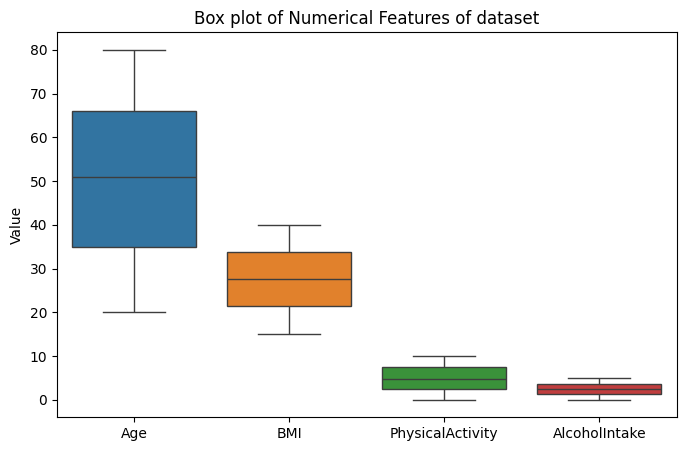

In [ ]:
#outlier detection
#box plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.boxplot([df['Age'], df['BMI'], df['PhysicalActivity'], df['AlcoholIntake']])
#plt.xlabel(labels= ['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake'])
plt.title('Box plot of Numerical Features of dataset')
plt.ylabel('Value')
plt.show()


In [ ]:
#correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
Age,1.000000,0.007145,0.030246,-0.013914,-0.027025,0.016396,0.003209,-0.010996,0.196603
Gender,0.007145,1.000000,-0.012516,0.035384,-0.004674,0.023401,0.009723,0.007657,0.250336
BMI,0.030246,-0.012516,1.000000,-0.012616,0.011392,0.011480,0.004711,-0.010824,0.187560
Smoking,-0.013914,0.035384,-0.012616,1.000000,-0.021039,-0.043817,-0.001660,0.016368,0.226999
GeneticRisk,-0.027025,-0.004674,0.011392,-0.021039,1.000000,-0.039721,-0.016864,-0.010833,0.253472
PhysicalActivity,0.016396,0.023401,0.011480,-0.043817,-0.039721,1.000000,0.033856,0.018136,-0.150089
AlcoholIntake,0.003209,0.009723,0.004711,-0.001660,-0.016864,0.033856,1.000000,0.055403,0.212772
CancerHistory,-0.010996,0.007657,-0.010824,0.016368,-0.010833,0.018136,0.055403,1.000000,0.392188
Diagnosis,0.196603,0.250336,0.187560,0.226999,0.253472,-0.150089,0.212772,0.392188,1.000000


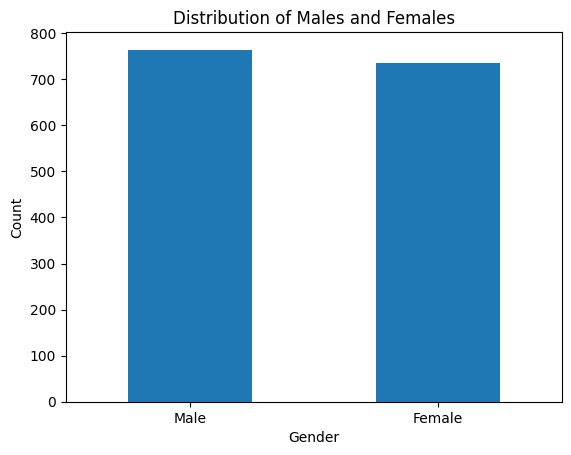

In [ ]:
#distribution of males and females
import matplotlib.pyplot as plt
#custom bar labels


df['Gender'].value_counts().plot(kind='bar',)
plt.title('Distribution of Males and Females')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0) # Set custom x-axis labels
plt.show()

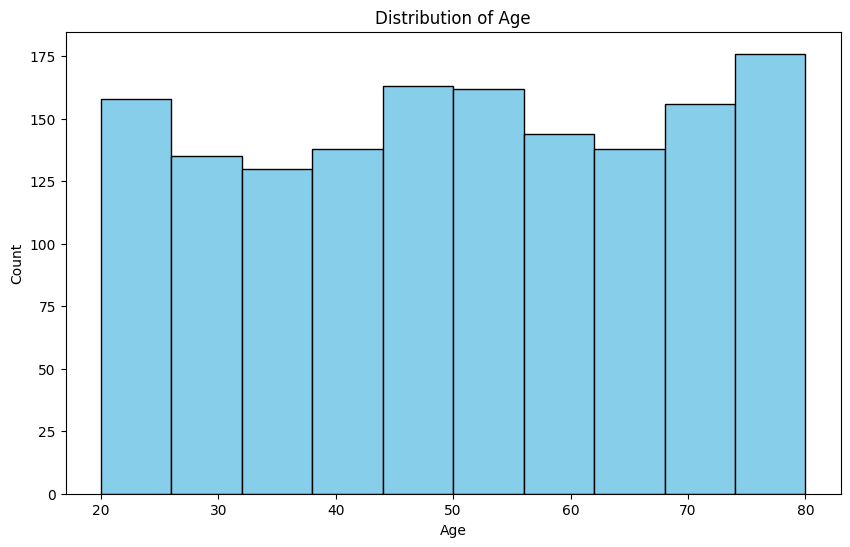

In [ ]:
#distribution of physical activity
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], color= 'skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

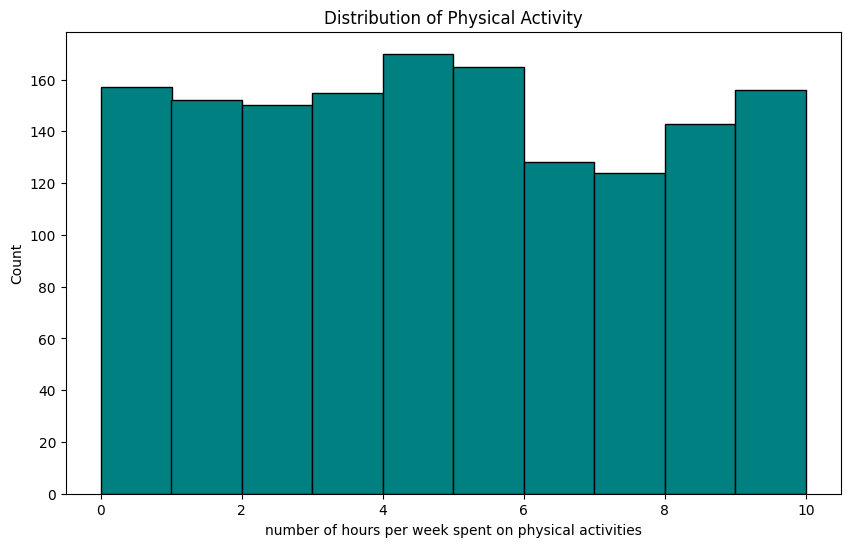

In [ ]:
#distribution of physical activity
plt.figure(figsize=(10, 6))
plt.hist(df['PhysicalActivity'], color= 'teal',width=1, edgecolor='black')
plt.title('Distribution of Physical Activity')
plt.xlabel('number of hours per week spent on physical activities')
plt.ylabel('Count')
plt.show()

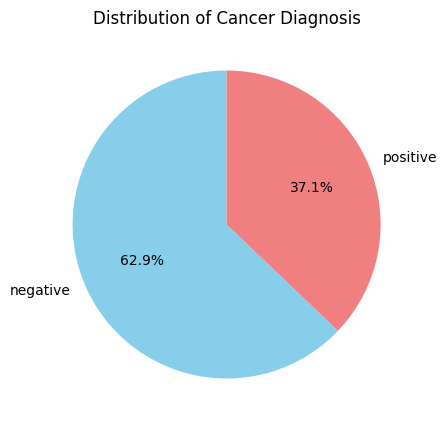

In [ ]:
#cancer diagnosis
plt.figure(figsize=(8, 5))
diagnosis_counts = df['Diagnosis'].value_counts()

# Define labels for the pie chart
pie_labels = diagnosis_counts.index.map({0: 'negative', 1: 'positive'})

diagnosis_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=pie_labels, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Cancer Diagnosis')
plt.ylabel('') # Remove the default 'Count' label on the y-axis for a pie chart
plt.show()

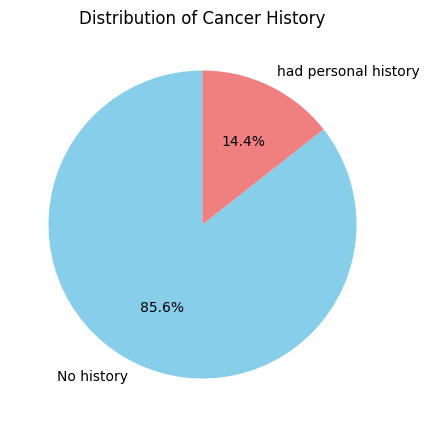

In [ ]:
#cancer diagnosis
plt.figure(figsize=(8, 5))
diagnosis_counts = df['CancerHistory'].value_counts()

# Define labels for the pie chart
pie_labels = diagnosis_counts.index.map({0: 'No history', 1: 'had personal history'})

diagnosis_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=pie_labels, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Cancer History')
plt.ylabel('') # Remove the default 'Count' label on the y-axis for a pie chart
plt.show()

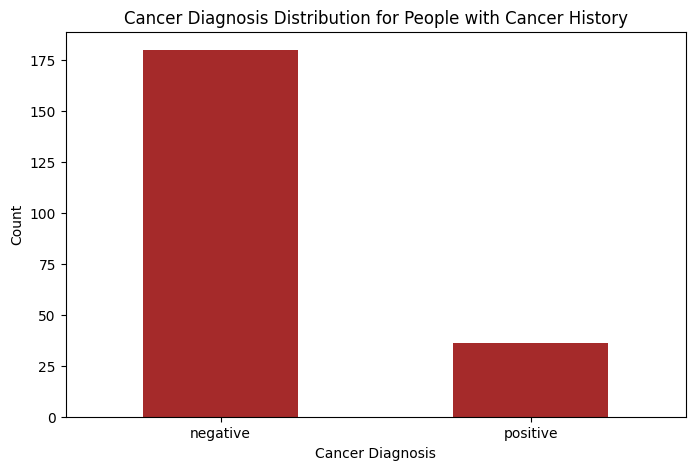

In [ ]:
#how many people with history get rediagnosed?
import matplotlib.pyplot as plt

# Filter the DataFrame for people with a history of cancer
cancer_history_df = df[df['CancerHistory'] == 1]

# Plot the distribution of diagnosis for this subset
plt.figure(figsize=(8, 5))
cancer_history_df['Diagnosis'].value_counts().plot(kind='bar', color='brown')
plt.xticks([0, 1], ['negative', 'positive'], rotation=360)
plt.title('Cancer Diagnosis Distribution for People with Cancer History')
plt.xlabel('Cancer Diagnosis')
plt.ylabel('Count')
plt.show()

Accuracy: 0.86
Precision:0.86
Recall:0.86
F1 Score:0.86


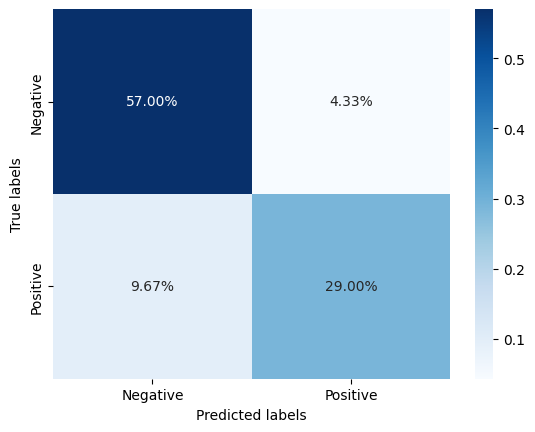

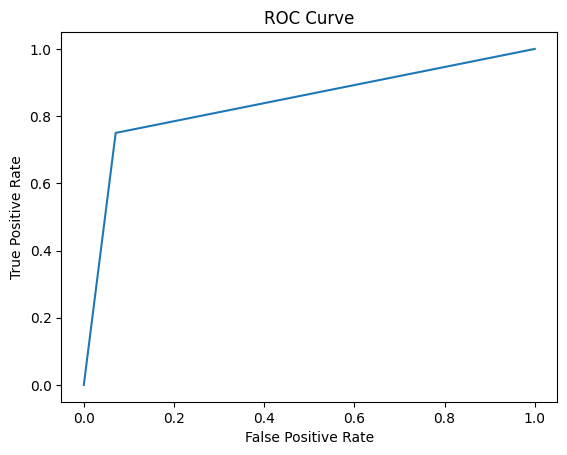

In [ ]:
#ML
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#split data with 20% for testing
(X_train, X_test, y_train, y_test) = train_test_split(df.drop('Diagnosis', axis=1), df['Diagnosis'], test_size=0.2, random_state=42)

#train model
model = LogisticRegression(max_iter=300)
lr = model.fit(X_train, y_train)

#predict
y_pred = lr.predict(X_test)

#Accuracy (only 2 digits)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve
accuracy = accuracy_score(y_test, y_pred.round())
print(f"Accuracy: {accuracy:.2f}")

#Precision
precision = precision_score(y_test, y_pred.round(), average='weighted')
print(f"Precision:{precision:.2f}")

#Recall
recall = recall_score(y_test, y_pred.round(), average='weighted')
print(f"Recall:{recall:.2f}")

#F1 score
f1_score = f1_score(y_test, y_pred.round(), average='weighted')
print(f"F1 Score:{f1_score:.2f}")

#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
labels= ['Negative','Positive']
cm = confusion_matrix(y_test, y_pred.round())
#heatmap (%)
sns.heatmap(cm/np.sum(cm), annot = True, fmt = '.2%', cmap ='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#roc curve with auc
roc = roc_curve(y_test, y_pred)
plt.plot(roc[0], roc[1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale (excluding the target 'Diagnosis' and binary 'Gender', 'Smoking', 'CancerHistory')
# Based on the description and head of the dataframe, these appear to be the numerical features.
numerical_cols = ['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Replace the original numerical columns with scaled data in the dataframes
X_train[numerical_cols] = X_train_scaled
X_test[numerical_cols] = X_test_scaled

print("Scaled X_train (first 5 rows):")
display(X_train.head())

print("\nScaled X_test (first 5 rows):")
display(X_test.head())

Scaled X_train (first 5 rows):


,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory
382,-0.357508,0,0.281283,0,-0.741249,0.800765,1.180046,0
538,0.598472,0,-1.369009,0,0.741249,-0.068029,1.635770,0
1493,0.486003,1,1.640068,0,-0.741249,-1.486814,-0.608493,0
1112,-0.357508,1,-0.093292,0,-0.741249,0.830008,-0.193010,0
324,0.542237,0,0.023463,0,-0.741249,1.542490,1.598880,0



Scaled X_test (first 5 rows):


,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory
1116,-0.245040,1,0.377858,0,0.741249,0.764983,0.233140,1
1368,-0.076338,1,0.844396,0,2.223748,-0.642980,0.091301,0
422,1.273281,0,-1.651698,0,-0.741249,0.580752,1.749152,0
413,-0.526211,0,-0.310232,0,-0.741249,0.678256,-0.613302,0
451,0.542237,0,-0.754420,1,-0.741249,1.005265,-1.357904,0


Accuracy: 0.74
Precision:0.75
Recall:0.74
F1 Score:0.73


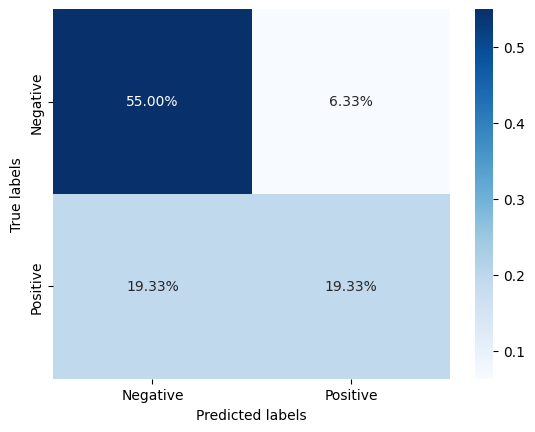

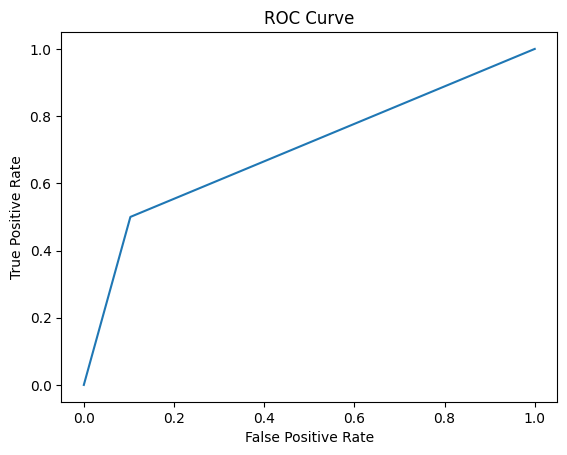

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

#train model
model = LogisticRegression()
lr = model.fit(X_train_scaled, y_train)

#predict
y_pred = lr.predict(X_test_scaled)

#Accuracy (only 2 digits)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve
accuracy = accuracy_score(y_test, y_pred.round())
print(f"Accuracy: {accuracy:.2f}")

#Precision
precision = precision_score(y_test, y_pred.round(), average='weighted')
print(f"Precision:{precision:.2f}")

#Recall
recall = recall_score(y_test, y_pred.round(), average='weighted')
print(f"Recall:{recall:.2f}")

#F1 score
f1_score = f1_score(y_test, y_pred.round(), average='weighted')
print(f"F1 Score:{f1_score:.2f}")

#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
labels= ['Negative','Positive']
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm/np.sum(cm), annot = True, fmt = '.2%', cmap ='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#roc curve with auc
roc = roc_curve(y_test, y_pred)
plt.plot(roc[0], roc[1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Accuracy: 0.87
Precision:0.87
Recall:0.87
F1 Score:0.87


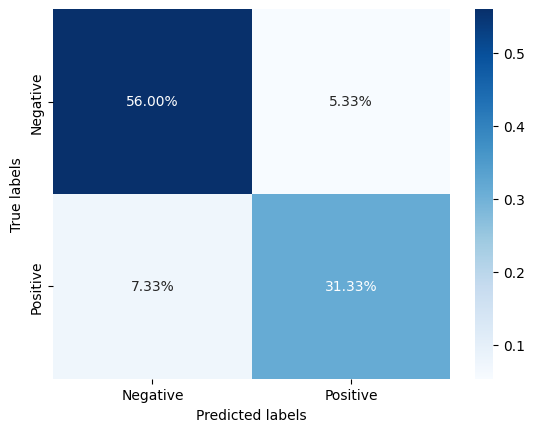

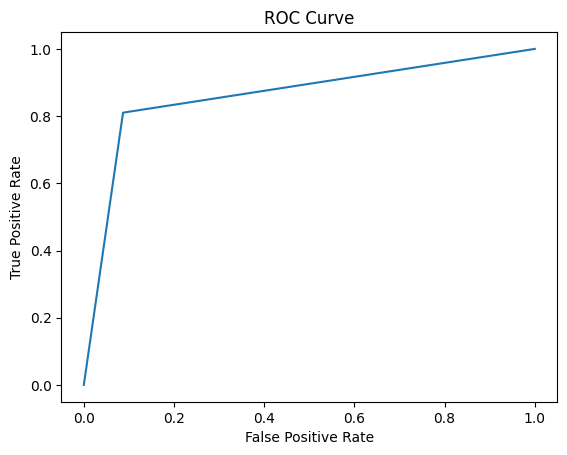

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
dt = model.fit(X_train, y_train)

#predict
y_pred = dt.predict(X_test)

#Accuracy (only 2 digits)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve
accuracy = accuracy_score(y_test, y_pred.round())
print(f"Accuracy: {accuracy:.2f}")

#Precision
precision = precision_score(y_test, y_pred.round(), average='weighted')
print(f"Precision:{precision:.2f}")

#Recall
recall = recall_score(y_test, y_pred.round(), average='weighted')
print(f"Recall:{recall:.2f}")

#F1 score
f1_score = f1_score(y_test, y_pred.round(), average='weighted')
print(f"F1 Score:{f1_score:.2f}")

#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
labels= ['Negative','Positive']
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm/np.sum(cm), annot = True, fmt = '.2%', cmap ='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#roc curve with auc
roc = roc_curve(y_test, y_pred)
plt.plot(roc[0], roc[1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Accuracy: 0.93
Precision:0.93
Recall:0.93
F1 Score:0.93


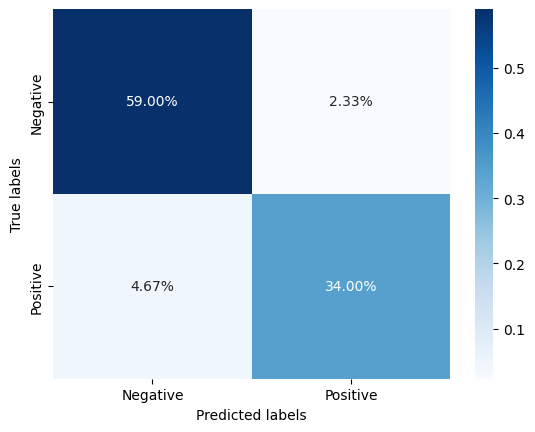

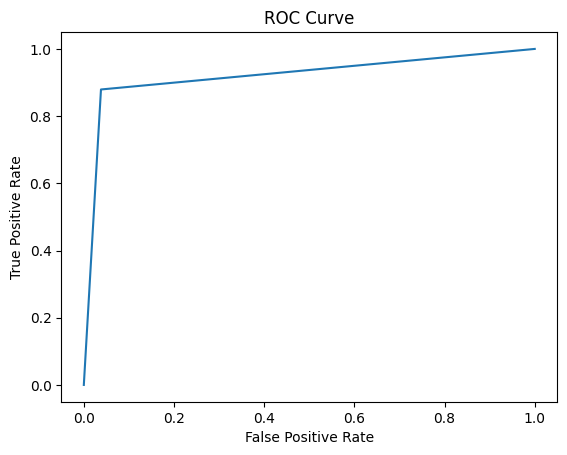

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
rf = model.fit(X_train, y_train)

#predict
y_pred = rf.predict(X_test)

#Accuracy (only 2 digits)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve
accuracy = accuracy_score(y_test, y_pred.round())
print(f"Accuracy: {accuracy:.2f}")

#Precision
precision = precision_score(y_test, y_pred.round(), average='weighted')
print(f"Precision:{precision:.2f}")

#Recall
recall = recall_score(y_test, y_pred.round(), average='weighted')
print(f"Recall:{recall:.2f}")

#F1 score
f1_score = f1_score(y_test, y_pred.round(), average='weighted')
print(f"F1 Score:{f1_score:.2f}")

#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
labels= ['Negative','Positive']
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm/np.sum(cm), annot = True, fmt = '.2%', cmap ='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#roc curve with auc
roc = roc_curve(y_test, y_pred)
plt.plot(roc[0], roc[1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Accuracy: 0.67
Precision:0.66
Recall:0.67
F1 Score:0.65


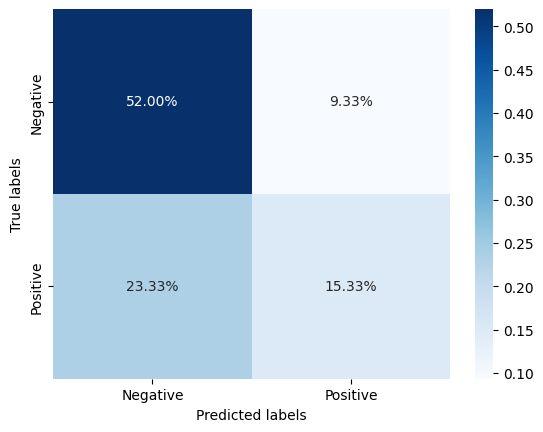

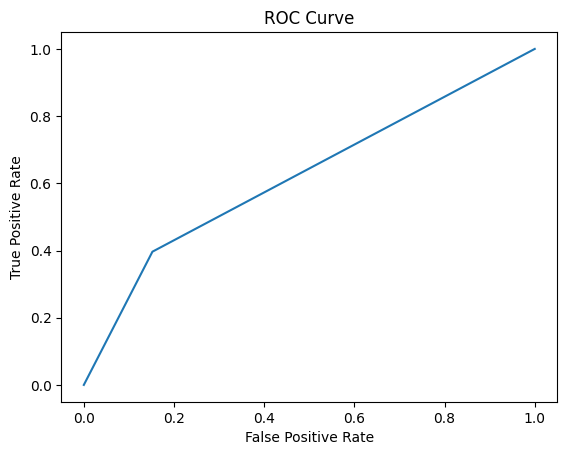

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
knn = model.fit(X_train, y_train)

#predict
y_pred = knn.predict(X_test)

#Accuracy (only 2 digits)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve
accuracy = accuracy_score(y_test, y_pred.round())
print(f"Accuracy: {accuracy:.2f}")

#Precision
precision = precision_score(y_test, y_pred.round(), average='weighted')
print(f"Precision:{precision:.2f}")

#Recall
recall = recall_score(y_test, y_pred.round(), average='weighted')
print(f"Recall:{recall:.2f}")

#F1 score
f1_score = f1_score(y_test, y_pred.round(), average='weighted')
print(f"F1 Score:{f1_score:.2f}")

#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
labels= ['Negative','Positive']
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm/np.sum(cm), annot = True, fmt = '.2%', cmap ='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#roc curve with auc
roc = roc_curve(y_test, y_pred)
plt.plot(roc[0], roc[1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Accuracy: 0.69
Precision:0.70
Recall:0.69
F1 Score:0.65


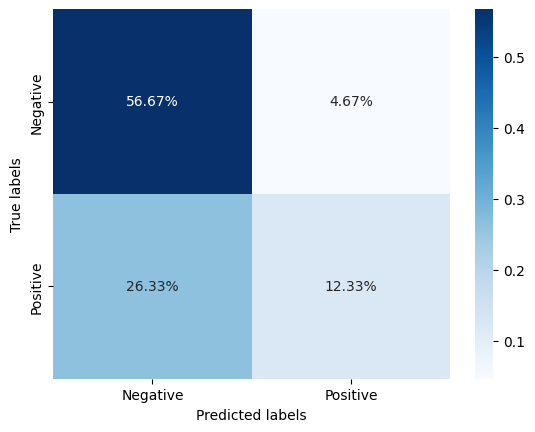

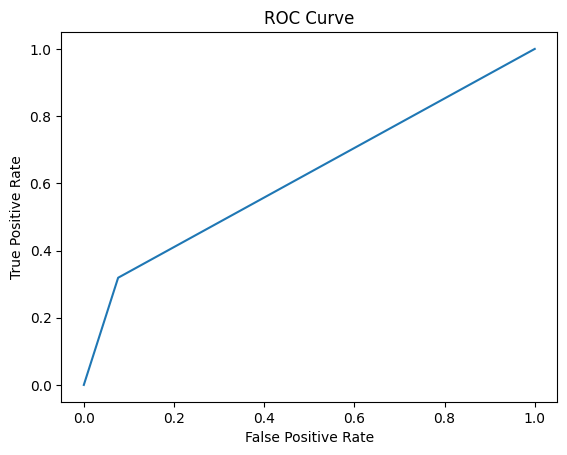

In [ ]:
#svm
from sklearn.svm import SVC
model = SVC()
svm = model.fit(X_train, y_train)

#predict
y_pred = svm.predict(X_test)

#Accuracy (only 2 digits)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve
accuracy = accuracy_score(y_test, y_pred.round())
print(f"Accuracy: {accuracy:.2f}")

#Precision
precision = precision_score(y_test, y_pred.round(), average='weighted')
print(f"Precision:{precision:.2f}")

#Recall
recall = recall_score(y_test, y_pred.round(), average='weighted')
print(f"Recall:{recall:.2f}")

#F1 score
f1_score = f1_score(y_test, y_pred.round(), average='weighted')
print(f"F1 Score:{f1_score:.2f}")

#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
labels= ['Negative','Positive']
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm/np.sum(cm), annot = True, fmt = '.2%', cmap ='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#roc curve with auc
roc = roc_curve(y_test, y_pred)
plt.plot(roc[0], roc[1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Accuracy: 0.93
Precision:0.93
Recall:0.93
F1 Score:0.93


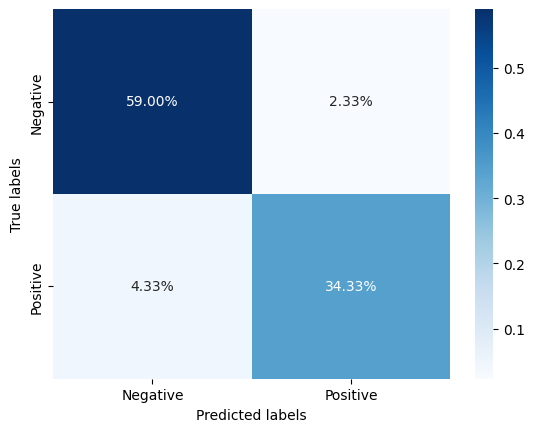

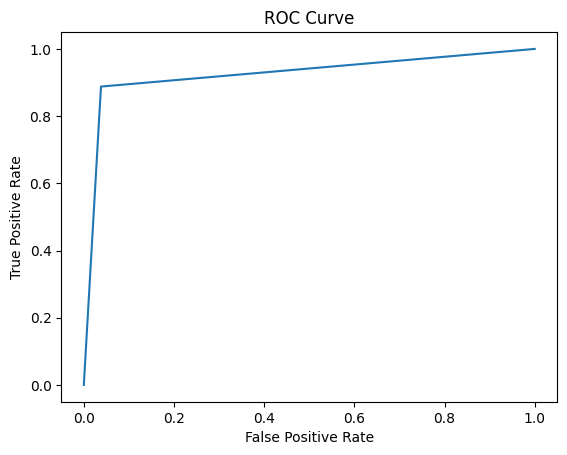

In [ ]:
#gradient boost
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
gb = model.fit(X_train, y_train)

#predict
y_pred = gb.predict(X_test)

#Accuracy (only 2 digits)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve
accuracy = accuracy_score(y_test, y_pred.round())
print(f"Accuracy: {accuracy:.2f}")

#Precision
precision = precision_score(y_test, y_pred.round(), average='weighted')
print(f"Precision:{precision:.2f}")

#Recall
recall = recall_score(y_test, y_pred.round(), average='weighted')
print(f"Recall:{recall:.2f}")

#F1 score
f1_score = f1_score(y_test, y_pred.round(), average='weighted')
print(f"F1 Score:{f1_score:.2f}")

#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
labels= ['Negative','Positive']
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm/np.sum(cm), annot = True, fmt = '.2%', cmap ='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#roc curve with auc
roc = roc_curve(y_test, y_pred)
plt.plot(roc[0], roc[1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Accuracy: 0.84
Precision:0.84
Recall:0.84
F1 Score:0.84


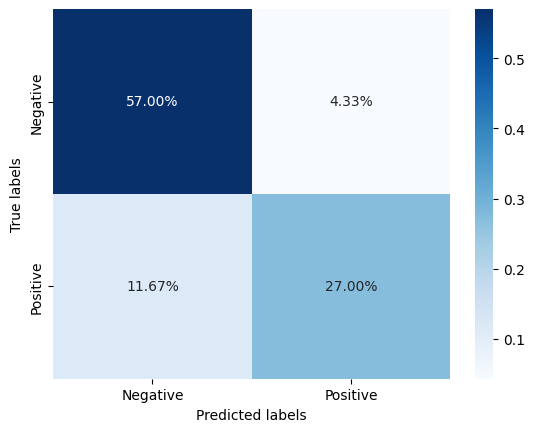

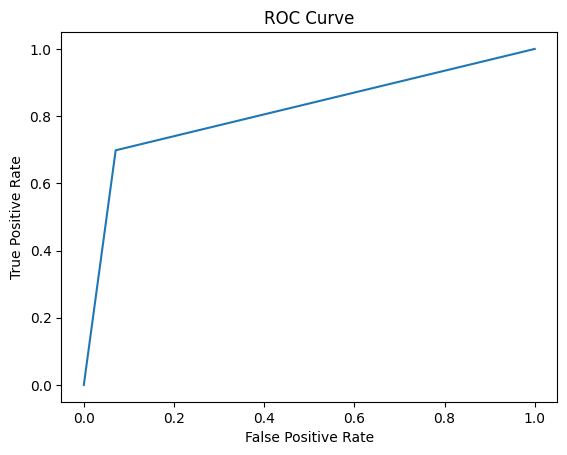

In [ ]:
#MLP
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter=300)
ann = model.fit(X_train, y_train)

#predict
y_pred = ann.predict(X_test)

#Accuracy (only 2 digits)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve
accuracy = accuracy_score(y_test, y_pred.round())
print(f"Accuracy: {accuracy:.2f}")

#Precision
precision = precision_score(y_test, y_pred.round(), average='weighted')
print(f"Precision:{precision:.2f}")

#Recall
recall = recall_score(y_test, y_pred.round(), average='weighted')
print(f"Recall:{recall:.2f}")

#F1 score
f1_score = f1_score(y_test, y_pred.round(), average='weighted')
print(f"F1 Score:{f1_score:.2f}")

#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
labels= ['Negative','Positive']
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm/np.sum(cm), annot = True, fmt = '.2%', cmap ='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#roc curve with auc
roc = roc_curve(y_test, y_pred)
plt.plot(roc[0], roc[1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Weighted averaging and blending ensemble methods for classification.

In [ ]:
#Train a Random Forest classifier and a Gradient Boosting classifier on the training data.
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Train Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

Weighted Average Ensemble Metrics:
Accuracy: 0.94
Precision:0.94
Recall:0.94
F1 Score:0.94


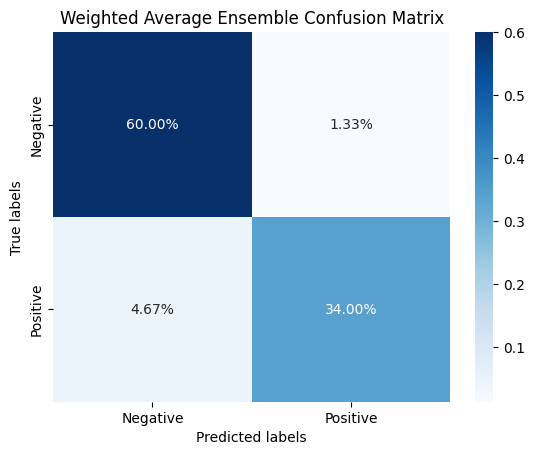

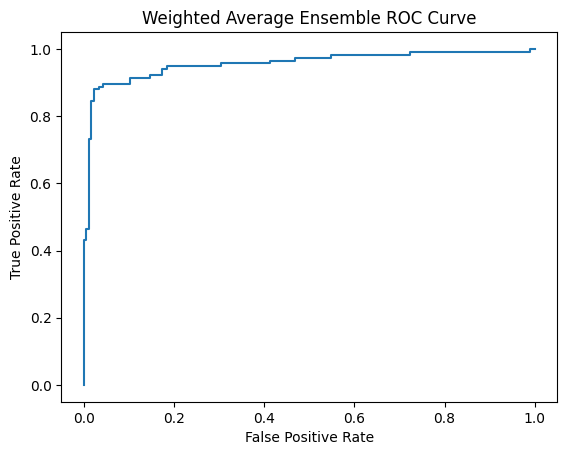

In [ ]:
#Average probabilities
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Get predicted probabilities from Random Forest and Gradient Boosting models
rf_probs = rf_model.predict_proba(X_test)[:, 1]
gb_probs = gb_model.predict_proba(X_test)[:, 1]

# Calculate weighted average of probabilities (using equal weights)
weighted_avg_probs = 0.5 * rf_probs + 0.5 * gb_probs

# Convert weighted average probabilities to class predictions
weighted_avg_preds = (weighted_avg_probs >= 0.5).astype(int)

# Evaluate the weighted average ensemble
accuracy = accuracy_score(y_test, weighted_avg_preds)
precision = precision_score(y_test, weighted_avg_preds, average='weighted')
recall = recall_score(y_test, weighted_avg_preds, average='weighted')
f1_score_weighted_avg = f1_score(y_test, weighted_avg_preds, average='weighted') # Renamed variable

print(f"Weighted Average Ensemble Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision:{precision:.2f}")
print(f"Recall:{recall:.2f}")
print(f"F1 Score:{f1_score_weighted_avg:.2f}")

# Confusion matrix
labels= ['Negative','Positive']
cm = confusion_matrix(y_test, weighted_avg_preds)
sns.heatmap(cm/np.sum(cm), annot = True, fmt = '.2%', cmap ='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Weighted Average Ensemble Confusion Matrix')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, weighted_avg_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Weighted Average Ensemble ROC Curve')
plt.show()

In [ ]:
#Blending ensemble
from sklearn.model_selection import train_test_split

# Split the original training data into a new training set and a hold-out blending set
X_train_blend, X_blend, y_train_blend, y_blend = train_test_split(
    X_train, y_train, test_size=0.5, random_state=42
)

print("Shape of X_train_blend:", X_train_blend.shape)
print("Shape of X_blend:", X_blend.shape)
print("Shape of y_train_blend:", y_train_blend.shape)
print("Shape of y_blend:", y_blend.shape)

Shape of X_train_blend: (600, 8)
Shape of X_blend: (600, 8)
Shape of y_train_blend: (600,)
Shape of y_blend: (600,)


In [ ]:
# Train Random Forest on blending training data
rf_model_blend = RandomForestClassifier()
rf_model_blend.fit(X_train_blend, y_train_blend)

# Train Gradient Boosting on blending training data
gb_model_blend = GradientBoostingClassifier()
gb_model_blend.fit(X_train_blend, y_train_blend)

GradientBoostingClassifier()

In [ ]:
# Probabilities from the trained Random Forest model on X_blend
rf_blend_preds = rf_model_blend.predict_proba(X_blend)[:, 1]

# Probabilities from the trained Gradient Boosting model on X_blend
gb_blend_preds = gb_model_blend.predict_proba(X_blend)[:, 1]

# Combine the predicted probabilities into a single DataFrame or NumPy array
X_meta = np.column_stack((rf_blend_preds, gb_blend_preds))

print("Shape of X_meta:", X_meta.shape)
print("\nX_meta (first 5 rows):")
display(X_meta[:5])

Shape of X_meta: (600, 2)

X_meta (first 5 rows):


array([[0.87      , 0.93499041],
       [0.89      , 0.77445323],
       [0.03      , 0.02232351],
       [0.5       , 0.51285046],
       [0.1       , 0.10545307]])

In [ ]:
# Train a meta-learner (e.g., Logistic Regression) on X_meta and y_blend
meta_learner = LogisticRegression()
meta_learner.fit(X_meta, y_blend)

print("Meta-learner trained successfully.")

Meta-learner trained successfully.


In [ ]:
# Get probabilities from the trained base models on the final test set (X_test)
rf_test_preds = rf_model_blend.predict_proba(X_test)[:, 1]
gb_test_preds = gb_model_blend.predict_proba(X_test)[:, 1]

# Combine the base model predictions on the test set
X_test_meta = np.column_stack((rf_test_preds, gb_test_preds))

# Make final predictions using the trained meta-learner
blending_preds = meta_learner.predict(X_test_meta)

print("Blending predictions generated on the test set.")

Blending predictions generated on the test set.


Blending Ensemble Metrics:
Accuracy: 0.93
Precision:0.93
Recall:0.93
F1 Score:0.93


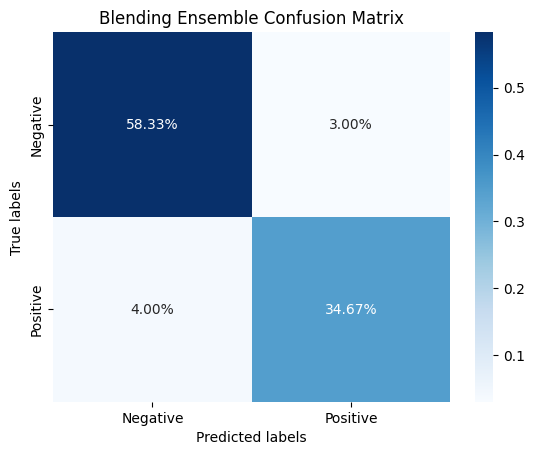

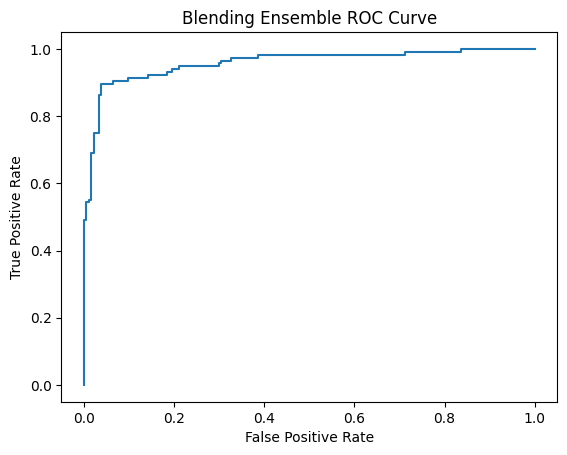

In [ ]:
# Evaluate the blending ensemble
accuracy = accuracy_score(y_test, blending_preds)
precision = precision_score(y_test, blending_preds, average='weighted')
recall = recall_score(y_test, blending_preds, average='weighted')
f1_score_blending = f1_score(y_test, blending_preds, average='weighted')

print(f"Blending Ensemble Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision:{precision:.2f}")
print(f"Recall:{recall:.2f}")
print(f"F1 Score:{f1_score_blending:.2f}")

# Confusion matrix
labels= ['Negative','Positive']
cm = confusion_matrix(y_test, blending_preds)
sns.heatmap(cm/np.sum(cm), annot = True, fmt = '.2%', cmap ='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Blending Ensemble Confusion Matrix')
plt.show()

# ROC curve
# Get predicted probabilities from the meta-learner for the ROC curve
blending_probs = meta_learner.predict_proba(X_test_meta)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, blending_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Blending Ensemble ROC Curve')
plt.show()

In [ ]:
import pandas as pd

# Metrics for each model
metrics_data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'k-NN', 'SVM', 'Gradient Boosting', 'Weighted Average Ensemble', 'Blending Ensemble'],
    'Accuracy': [0.86, 0.87, 0.93, 0.67, 0.69, 0.93, 0.94, 0.93],
    'Precision': [0.86, 0.87, 0.93, 0.66, 0.70, 0.93, 0.94, 0.93],
    'Recall': [0.86, 0.87, 0.93, 0.67, 0.69, 0.93, 0.94, 0.93],
    'F1 Score': [0.86, 0.87, 0.93, 0.65, 0.65, 0.93, 0.94, 0.93]
}

metrics_df = pd.DataFrame(metrics_data)

print("Performance Comparison of Models and Ensemble Methods:")
display(metrics_df)

print("Analysis:\n Based on the metrics, the Weighted Average Ensemble achieved the highest accuracy, precision, recall, and F1 score.\n Both Random Forest and Gradient Boosting performed very well individually, and their ensemble methods further improved the performance.")
print("Logistic Regression and Decision Tree also showed good performance, while k-NN and SVM had lower scores on this dataset.")

Performance Comparison of Models and Ensemble Methods:


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.86,0.86,0.86,0.86
1,Decision Tree,0.87,0.87,0.87,0.87
2,Random Forest,0.93,0.93,0.93,0.93
3,k-NN,0.67,0.66,0.67,0.65
4,SVM,0.69,0.70,0.69,0.65
5,Gradient Boosting,0.93,0.93,0.93,0.93
6,Weighted Average Ensemble,0.94,0.94,0.94,0.94
7,Blending Ensemble,0.93,0.93,0.93,0.93



Analysis:
Based on the metrics, the Weighted Average Ensemble achieved the highest accuracy, precision, recall, and F1 score.
Both Random Forest and Gradient Boosting performed very well individually, and their ensemble methods further improved the performance.
Logistic Regression and Decision Tree also showed good performance, while k-NN and SVM had lower scores on this dataset.


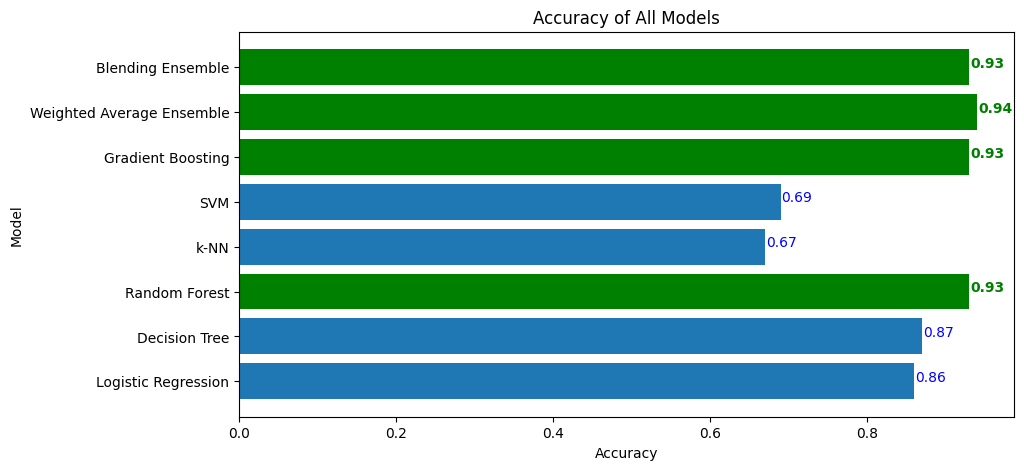

In [ ]:
#plot of accuracies of all models
#horizaontal bar
plt.figure(figsize=[10,5])
plt.barh(metrics_df['Model'],metrics_df['Accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy of All Models')

#colour bars with >0.9 green
for i, v in enumerate(metrics_df['Accuracy']):
    if v > 0.9:
        plt.text(v + 0.001, i, str(round(v, 2)), color='green', fontweight='bold')
        #bar color green
        plt.barh(metrics_df['Model'][i], v, color='green')
    else:
        plt.text(v + 0.001, i, str(round(v, 2)), color='blue')
plt.show()

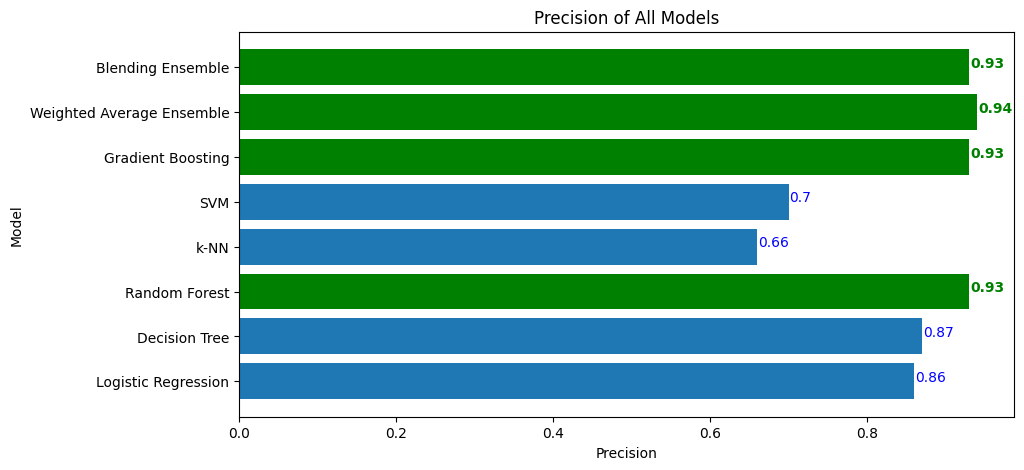

In [ ]:
#plot of precision of all models
#horizaontal bar
plt.figure(figsize=[10,5])
plt.barh(metrics_df['Model'],metrics_df['Precision'])
plt.xlabel('Precision')
plt.ylabel('Model')
plt.title('Precision of All Models')

#colour bars with >0.9 green
for i, v in enumerate(metrics_df['Precision']):
    if v > 0.9:
        plt.text(v + 0.001, i, str(round(v, 2)), color='green', fontweight='bold')
        #bar color green
        plt.barh(metrics_df['Model'][i], v, color='green')
    else:
        plt.text(v + 0.001, i, str(round(v, 2)), color='blue')
plt.show()

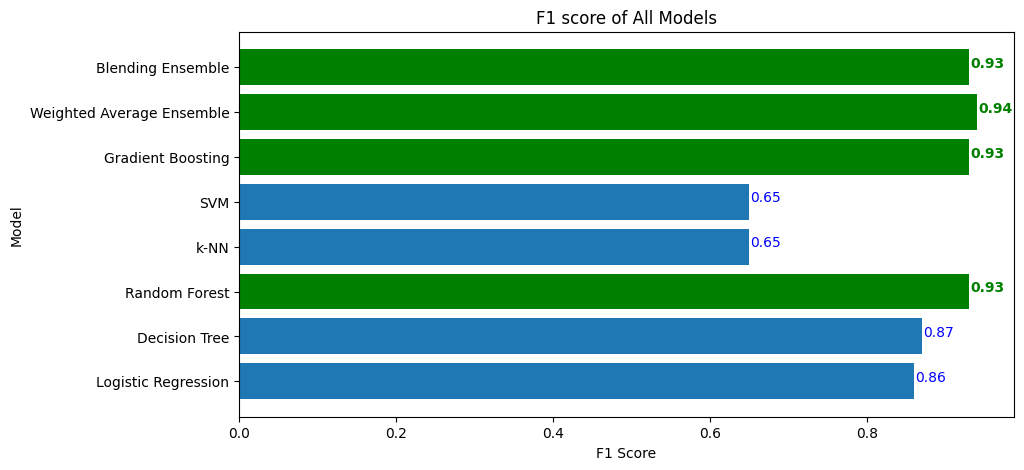

In [ ]:
#f1 score
#plot of accuracies of all models
#horizaontal bar
plt.figure(figsize=[10,5])
plt.barh(metrics_df['Model'],metrics_df['F1 Score'])
plt.xlabel('F1 Score')
plt.ylabel('Model')
plt.title('F1 score of All Models')

#colour bars with >0.9 green
for i, v in enumerate(metrics_df['F1 Score']):
    if v > 0.9:
        plt.text(v + 0.001, i, str(round(v, 2)), color='green', fontweight='bold')
        #bar color green
        plt.barh(metrics_df['Model'][i], v, color='green')
    else:
        plt.text(v + 0.001, i, str(round(v, 2)), color='blue')
plt.show()

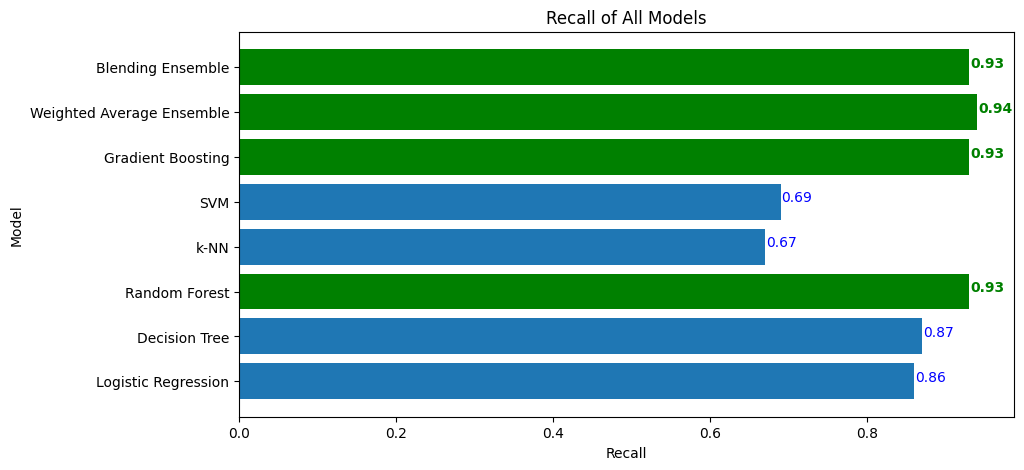

In [ ]:
#recall
#plot of accuracies of all models
#horizaontal bar
plt.figure(figsize=[10,5])
plt.barh(metrics_df['Model'],metrics_df['Recall'])
plt.xlabel('Recall')
plt.ylabel('Model')
plt.title('Recall of All Models')

#colour bars with >0.9 green
for i, v in enumerate(metrics_df['Recall']):
    if v > 0.9:
        plt.text(v + 0.001, i, str(round(v, 2)), color='green', fontweight='bold')
        #bar color green
        plt.barh(metrics_df['Model'][i], v, color='green')
    else:
        plt.text(v + 0.001, i, str(round(v, 2)), color='blue')
plt.show()

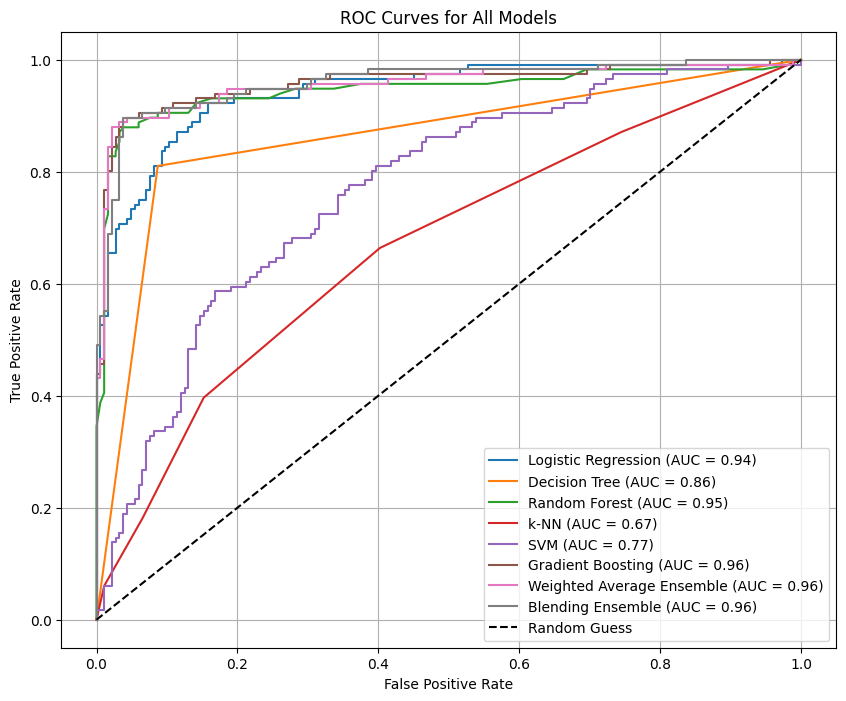

In [ ]:
#roc curves of all models
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define a dictionary of the trained models
models = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf,
    'k-NN': knn,
    'SVM': svm,
    'Gradient Boosting': gb,
    'Weighted Average Ensemble': None, # Placeholder for ensemble
    'Blending Ensemble': None # Placeholder for ensemble
}

# Create a new figure for the ROC curves
plt.figure(figsize=(10, 8))

# Iterate through the models and plot the ROC curve
for name, model in models.items():
    if name == 'Weighted Average Ensemble':
        # For weighted average
        fpr, tpr, _ = roc_curve(y_test, weighted_avg_probs)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')
    elif name == 'Blending Ensemble':
        # For blending
        fpr, tpr, _ = roc_curve(y_test, blending_probs)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')
    elif model is not None:
        # other models
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test)[:, 1]
        else: # For models like SVM that don't have predict_proba by default
             y_pred_proba = model.decision_function(X_test)


        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')

# Plot the diagonal random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.grid(True)
plt.show()